In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
matches = pd.read_csv(r"D:\ML\IPL_win_probability\data\matches.csv")
deliveries = pd.read_csv(r"D:\ML\IPL_win_probability\data\deliveries.csv")

In [3]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [6]:
df=pd.merge(deliveries, matches[['id','city','target_runs','target_overs','winner']], left_on ='match_id', right_on='id')

In [7]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,id,city,target_runs,target_overs,winner
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,legbyes,0,NaN,NaN,NaN,335982,Bangalore,223.0,20.0,Kolkata Knight Riders
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,0,NaN,NaN,NaN,335982,Bangalore,223.0,20.0,Kolkata Knight Riders
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,wides,0,NaN,NaN,NaN,335982,Bangalore,223.0,20.0,Kolkata Knight Riders
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,0,NaN,NaN,NaN,335982,Bangalore,223.0,20.0,Kolkata Knight Riders
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,0,NaN,NaN,NaN,335982,Bangalore,223.0,20.0,Kolkata Knight Riders


In [8]:
df=df[df['inning']==2]#tracking only while chasing

In [9]:
df['curr_total'] = df.groupby('match_id').agg({'total_runs':'cumsum'})

In [10]:
df['runs_left'] = df['target_runs']-df['curr_total'] #calculating runs left

In [11]:
df['balls_left'] = 120-(df['over']*6+df['ball']) # balls left after each ball is thrown

In [12]:
df['total_wkts_down'] = df.groupby('match_id').agg({'is_wicket':'cumsum'})

In [13]:
df['wickets_left'] = 10- df['total_wkts_down']# wickets left after each ball

In [14]:
df['crr'] = (df['curr_total']*6)/(120-df['balls_left'])

In [15]:
#df[df['match_id']==335986][['total_runs','curr_total','balls_left','runs_left','over','crr']].tail()

In [16]:
df['rrr'] = (df['runs_left']*6)/(df['balls_left'])# doubting here

In [17]:
df['result'] = df.apply(lambda x : 1 if x['winner']==x['batting_team'] else 0,axis=1)

In [18]:
final=df[['city','batting_team','bowling_team','runs_left','balls_left','wickets_left','target_runs','crr','rrr','result']]

In [19]:
#df[df['match_id']==980943][['target_runs','total_runs','curr_total','runs_left']].to_csv('negative.csv')

In [20]:
final.dropna(inplace=True)
final=final[final['balls_left']!=0]

C:\Users\ravik\AppData\Local\Temp\ipykernel_5392\3472386844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final.dropna(inplace=True)


In [28]:
final['batting_team'] = final['batting_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
final['bowling_team'] = final['bowling_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
final['batting_team'] = final['batting_team'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
final['bowling_team'] = final['bowling_team'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
final['batting_team'] = final['batting_team'].replace('Pune Warriors','Rising Pune Supergiants')
final['bowling_team'] = final['bowling_team'].replace('Pune Warriors','Rising Pune Supergiants')
final['batting_team'] = final['batting_team'].replace('Gujarat Lions','Gujarat Titans')
final['bowling_team'] = final['bowling_team'].replace('Gujarat Lions','Gujarat Titans')
final['batting_team'] = final['batting_team'].replace('Kings XI Punjab','Punjab Kings')
final['bowling_team'] = final['bowling_team'].replace('Kings XI Punjab','Punjab Kings')
final['batting_team'] = final['batting_team'].replace('Delhi Daredevils','Delhi Capitals')
final['bowling_team'] = final['bowling_team'].replace('Delhi Daredevils','Delhi Capitals')

In [50]:
df['batting_team'] = df['batting_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
df['bowling_team'] = df['bowling_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
df['batting_team'] = df['batting_team'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
df['bowling_team'] = df['bowling_team'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
df['batting_team'] = df['batting_team'].replace('Pune Warriors','Rising Pune Supergiants')
df['bowling_team'] = df['bowling_team'].replace('Pune Warriors','Rising Pune Supergiants')
df['batting_team'] = df['batting_team'].replace('Gujarat Lions','Gujarat Titans')
df['bowling_team'] = df['bowling_team'].replace('Gujarat Lions','Gujarat Titans')
df['batting_team'] = df['batting_team'].replace('Kings XI Punjab','Punjab Kings')
df['bowling_team'] = df['bowling_team'].replace('Kings XI Punjab','Punjab Kings')
df['batting_team'] = df['batting_team'].replace('Delhi Daredevils','Delhi Capitals')
df['bowling_team'] = df['bowling_team'].replace('Delhi Daredevils','Delhi Capitals')

In [37]:
final['batting_team'].unique()

array(['Royal Challengers Bengaluru', 'Punjab Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Deccan Chargers',
       'Rising Pune Supergiants', 'Kochi Tuskers Kerala',
       'Sunrisers Hyderabad', 'Gujarat Titans', 'Lucknow Super Giants'],
      dtype=object)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [39]:
x_train,x_test,y_train,y_test=train_test_split(final.drop(columns=['result']),final['result'], train_size=0.8, random_state=42)

In [40]:
trf=ColumnTransformer([
    ('trf1',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

pipe = Pipeline(steps=[
    ('proc1',trf),
    ('proc2',LogisticRegression(solver='liblinear'))
])

In [41]:
final.describe()

,runs_left,balls_left,wickets_left,target_runs,crr,rrr,result
count,119317.000000,119317.000000,119317.000000,119317.000000,119317.000000,119317.000000,119317.000000
mean,93.789485,63.036910,7.525131,168.027364,7.606536,10.597173,0.523521
std,50.836584,33.285894,2.142881,31.497647,2.369892,14.123602,0.499449
min,-33.000000,-3.000000,0.000000,43.000000,0.000000,-516.000000,0.000000
25%,54.000000,35.000000,6.000000,149.000000,6.384615,7.241379,0.000000
50%,93.000000,64.000000,8.000000,168.000000,7.612903,9.000000,1.000000
75%,131.000000,92.000000,9.000000,188.000000,8.880000,11.142857,1.000000
max,287.000000,119.000000,10.000000,288.000000,36.000000,792.000000,1.000000


In [42]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('proc1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('proc2', LogisticRegression(solver='liblinear'))])

In [43]:
y_pred=pipe.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8072410325175997

In [51]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['city','batting_team','bowling_team','runs_left','balls_left','wickets_left','target_runs','crr','rrr','result']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['target_runs'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [52]:
new_df,target=match_progression(df,335982,pipe)
pd.DataFrame(new_df)

Target- 223.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
129,1,4.0,0,93.2,6.8
136,2,5.0,1,96.2,3.8
142,3,2.0,1,98.3,1.7
149,4,5.0,0,98.3,1.7
155,5,8.0,1,98.9,1.1
161,6,2.0,1,99.5,0.5
167,7,3.0,0,99.6,0.4
175,8,9.0,1,99.7,0.3
181,9,3.0,1,99.9,0.1
189,10,9.0,1,99.9,0.1


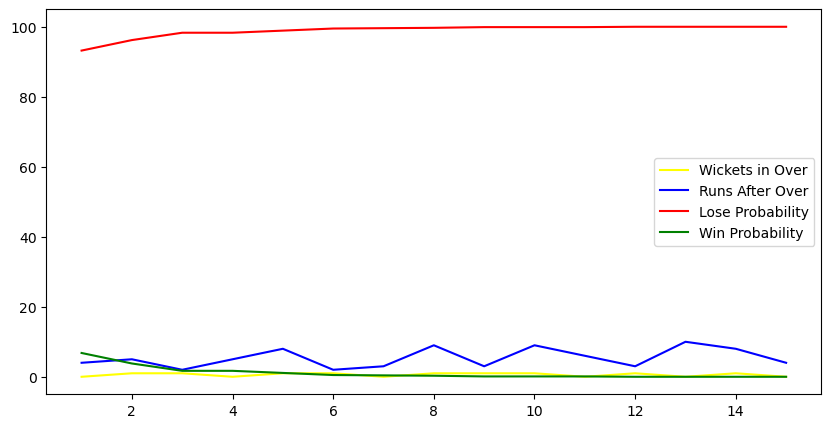

In [53]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 5))

# Plot all lines within a single plt.plot() call
plt.plot(new_df['end_of_over'], new_df['wickets_in_over'], label='Wickets in Over', color='yellow')
plt.plot(new_df['end_of_over'], new_df['runs_after_over'], label='Runs After Over', color='blue')
plt.plot(new_df['end_of_over'], new_df['lose'], label='Lose Probability', color='red')
plt.plot(new_df['end_of_over'], new_df['win'], label='Win Probability', color='green')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [54]:
import pickle
pickle.dump(pipe,open("pipe.pkl","wb"))

In [55]:
final['batting_team'].unique()

array(['Royal Challengers Bengaluru', 'Punjab Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Deccan Chargers',
       'Rising Pune Supergiants', 'Kochi Tuskers Kerala',
       'Sunrisers Hyderabad', 'Gujarat Titans', 'Lucknow Super Giants'],
      dtype=object)

In [56]:
final['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Rajkot', 'Kanpur', 'Bengaluru', 'Sharjah', 'Dubai',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)